In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Excel dosyasından veri setini oku
data = pd.read_excel("Data.xlsx")
data

,Müşteri No,Yaş Grubu,Alışveriş Periyodu,Churn Durumu,Harcama Tutarı,Üyelik Tipi,Kitap Türü
0,1,44,Yıllık,Hayır,108.19,Standart,Bilim
1,2,31,Aylık,Evet,283.62,Premium,Bilim
2,3,33,Haftalık,Hayır,93.14,Standart,Tarih
3,4,20,Yıllık,Hayır,422.31,Standart,Felsefe
4,5,64,Aylık,Hayır,430.52,Premium,Roman
...,...,...,...,...,...,...,...
95,96,31,Haftalık,Evet,180.16,Standart,Bilim
96,97,40,Aylık,Hayır,495.76,Standart,Tarih
97,98,72,Yıllık,Hayır,364.66,Premium,Roman
98,99,74,Aylık,Evet,211.92,Standart,Sanat


In [3]:
# Kullanılacak özellikleri seç
features = data[['Yaş Grubu', 'Harcama Tutarı']]
features

,Yaş Grubu,Harcama Tutarı
0,44,108.19
1,31,283.62
2,33,93.14
3,20,422.31
4,64,430.52
...,...,...
95,31,180.16
96,40,495.76
97,72,364.66
98,74,211.92


In [4]:
# Verileri ölçeklendir
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [7]:
# K-means kümeleme modelini oluştur
kmeans = KMeans(n_clusters=3)  # Örnek olarak 3 küme seçtik
kmeans.fit(scaled_features)

# Küme etiketlerini veri setine ekle
data['Cluster'] = kmeans.labels_
data

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Müşteri No,Yaş Grubu,Alışveriş Periyodu,Churn Durumu,Harcama Tutarı,Üyelik Tipi,Kitap Türü,Cluster
0,1,44,Yıllık,Hayır,108.19,Standart,Bilim,2
1,2,31,Aylık,Evet,283.62,Premium,Bilim,1
2,3,33,Haftalık,Hayır,93.14,Standart,Tarih,2
3,4,20,Yıllık,Hayır,422.31,Standart,Felsefe,1
4,5,64,Aylık,Hayır,430.52,Premium,Roman,0
...,...,...,...,...,...,...,...,...
95,96,31,Haftalık,Evet,180.16,Standart,Bilim,2
96,97,40,Aylık,Hayır,495.76,Standart,Tarih,1
97,98,72,Yıllık,Hayır,364.66,Premium,Roman,0
98,99,74,Aylık,Evet,211.92,Standart,Sanat,0


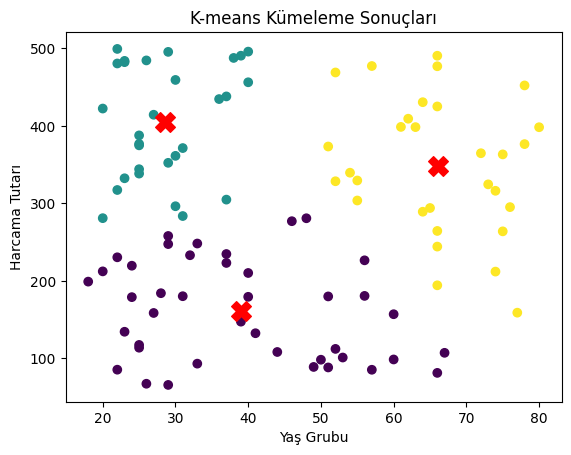

In [6]:
# Elde edilen kümeleme sonuçlarını görselleştir
plt.scatter(data['Yaş Grubu'], data['Harcama Tutarı'], c=data['Cluster'], cmap='viridis', label='Veri Noktaları')
plt.xlabel('Yaş Grubu')
plt.ylabel('Harcama Tutarı')
plt.title('K-means Kümeleme Sonuçları')

# Küme merkezlerini çiz
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)  # Ölçeklemeden önceki değerlere dön
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Küme Merkezleri')

plt.show()